# Construction & Comparaison de modèles

## Définition de la fonction de scoring

Future Vision Transport est une entreprise qui conçoit des systèmes embarqués de vision par ordinateur pour les véhicules autonomes.

## Construction d'un modèle de convolution


[A compléter]

<img src='https://divamgupta.com/assets/images/posts/imgseg/image6.png?style=centerme'>

In [47]:
%%time
## Encodeur
from tensorflow.keras.layers import Conv2D, Input,Dropout, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, concatenate, UpSampling2D
from keras_segmentation.models.model_utils import get_segmentation_model
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras


class My_Model_(Model):
    def __init__(self, img_input_shape):
        self.input_shape_ = img_input_shape
        self.model = None
        
    def model_function(self):
        def predict_class(X):
            X = self.predict_generator(X)
            y_pred = []
            for x in X :
                p = []
                for u in x:
                    for i in u:
                        p.append(i.argmax())
                y_pred.append(np.array(p).reshape((model.input_shape[2], model.input_shape[1])))
            return y_pred
        
        
        img_input = Input(shape=self.input_shape_)

        
        conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(img_input)
        conv1 = Dropout(0.2)(conv1)
        conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
        pool1 = MaxPooling2D((2, 2))(conv1)

        conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
        conv2 = Dropout(0.2)(conv2)
        conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
        pool2 = MaxPooling2D((2, 2))(conv2)


        ## Décodeur
        conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
        conv3 = Dropout(0.2)(conv3)
        conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

        up1 = concatenate([UpSampling2D((2, 2))(conv3), conv2], axis=-1)
        conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
        conv4 = Dropout(0.2)(conv4)
        conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

        up2 = concatenate([UpSampling2D((2, 2))(conv4), conv1], axis=-1)
        conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
        conv5 = Dropout(0.2)(conv5)
        conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

        out = Conv2D(8, (1, 1) , padding='same', activation='softmax')(conv5)

        model = Model(img_input ,  out)
        self = model
        self.predict_class = predict_class
        return self

CPU times: user 129 µs, sys: 3 µs, total: 132 µs
Wall time: 137 µs


## Construction d'un modèle via transfert learning

<img src='https://divamgupta.com/assets/images/posts/imgseg/image4.png?style=centerme'>

In [58]:
import cv2
import tensorflow.keras as keras

img_input_shape = (1024, 2048,3)
base_model = keras.applications.ResNet50(include_top=False, input_shape=(1024, 2048,3), weights="imagenet")


conv = Conv2D(0, (3, 3), activation='relu', padding='same')(base_model.input)
up3 = concatenate([UpSampling2D((32, 32))(base_model.output), conv], axis=-1)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(up3)
out = Conv2D(8, (1, 1) , padding='same', activation='softmax')(conv1)
model_resnet = Model(base_model.input ,  out)

model_resnet.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 1024, 2048,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 1030, 2054,   0           ['input_12[0][0]']               
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, 512, 1024, 6  9472        ['conv1_pad[0][0]']              
                                4)                                                         

                                                                                                  
 conv2_block2_add (Add)         (None, 256, 512, 25  0           ['conv2_block1_out[0][0]',       
                                6)                                'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, 256, 512, 25  0           ['conv2_block2_add[0][0]']       
                                6)                                                                
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 256, 512, 64  16448       ['conv2_block2_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv2_blo

                                8)                                                                
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 128, 256, 12  512        ['conv3_block2_2_conv[0][0]']    
 ization)                       8)                                                                
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 128, 256, 12  0          ['conv3_block2_2_bn[0][0]']      
 n)                             8)                                                                
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 128, 256, 51  66048       ['conv3_block2_2_relu[0][0]']    
                                2)                                                                
          

 conv4_block1_1_bn (BatchNormal  (None, 64, 128, 256  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 64, 128, 256  0          ['conv4_block1_1_bn[0][0]']      
 n)                             )                                                                 
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, 64, 128, 256  590080      ['conv4_block1_1_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, 64, 128, 256  1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, 64, 128, 102  4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       4)                                                                
                                                                                                  
 conv4_block3_add (Add)         (None, 64, 128, 102  0           ['conv4_block2_out[0][0]',       
                                4)                                'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, 64, 128, 102  0           ['conv4_block3_add[0][0]']       
                                4)                                                                
                                                                                                  
 conv4_blo

 ization)                       )                                                                 
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, 64, 128, 256  0          ['conv4_block6_2_bn[0][0]']      
 n)                             )                                                                 
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, 64, 128, 102  263168      ['conv4_block6_2_relu[0][0]']    
                                4)                                                                
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, 64, 128, 102  4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       4)                                                                
          

                                                                                                  
 conv5_block3_1_relu (Activatio  (None, 32, 64, 512)  0          ['conv5_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, 32, 64, 512)  2359808     ['conv5_block3_1_relu[0][0]']    
                                                                                                  
 conv5_block3_2_bn (BatchNormal  (None, 32, 64, 512)  2048       ['conv5_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_2_relu (Activatio  (None, 32, 64, 512)  0          ['conv5_block3_2_bn[0][0]']      
 n)       

# Entrainement des modèles

## Entrainement du model CNN

* <b> Entrainement simple</b>

In [3]:
%%time
import pandas as pd
from class_ import MY_Generator

img_input_shape = (1024, 2048,1)
model = My_Model_(img_input_shape).model_function()

df = pd.read_csv('data.csv')

my_training_batch_generator = MY_Generator(df.id[:100], 2)
my_validation_batch_generator = MY_Generator(df.id[100:140], 2)


model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit_generator(generator=my_training_batch_generator,
                    validation_data=my_validation_batch_generator,
                    epochs=5,
                    verbose=1,
                    workers=2
                    )

y_pred = model.predict_class(my_validation_batch_generator)

Epoch 1/5


<timed exec>:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
2022-02-21 21:08:03.476098: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-21 21:08:03.807730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - ETA: 0s - loss: 0.5528 - accuracy: 0.2864

2022-02-21 21:11:00.104708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 184s 4s/step - loss: 0.5528 - accuracy: 0.2864 - val_loss: 0.3760 - val_accuracy: 0.4136
Epoch 2/5
50/50 [==============================] - 184s 4s/step - loss: 0.3588 - accuracy: 0.3735 - val_loss: 0.3403 - val_accuracy: 0.4184
Epoch 3/5
50/50 [==============================] - 183s 4s/step - loss: 0.3287 - accuracy: 0.4345 - val_loss: 0.3079 - val_accuracy: 0.5221
Epoch 4/5
50/50 [==============================] - 184s 4s/step - loss: 0.2828 - accuracy: 0.5063 - val_loss: 0.2626 - val_accuracy: 0.5291
Epoch 5/5
50/50 [==============================] - 183s 4s/step - loss: 0.2621 - accuracy: 0.5349 - val_loss: 0.2633 - val_accuracy: 0.5428
CPU times: user 3min 6s, sys: 8min 31s, total: 11min 38s
Wall time: 15min 18s


* <b> Entrainement avec réduction de la taille des images + génération aléatoire d'image</b>

In [53]:
import pandas as pd
from class_ import MY_Generator

img_input_shape = (512, 256,1)
model = My_Model_(img_input_shape).model_function()

df = pd.read_csv('data.csv')

my_training_batch_generator = MY_Generator(df.id[:200], 2, red_shape = (256, 512))
my_validation_batch_generator = MY_Generator(df.id[200:240], 2, red_shape = (256, 512))


model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit_generator(generator=my_training_batch_generator,
                    validation_data=my_validation_batch_generator,
                    epochs=15,
                    verbose=1,
                    use_multiprocessing=True,
                    workers=4
                    )

Epoch 1/15


/var/folders/pd/d9xkkvws5r5f_x34lthx34ph0000gn/T/ipykernel_24920/956540758.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=my_training_batch_generator,
2022-02-21 22:28:50.267039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.3524 - accuracy: 0.4392

2022-02-21 22:29:14.454293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 28s 248ms/step - loss: 0.3524 - accuracy: 0.4392 - val_loss: 0.2935 - val_accuracy: 0.5338
Epoch 2/15
100/100 [==============================] - 27s 247ms/step - loss: 0.2589 - accuracy: 0.5745 - val_loss: 0.2613 - val_accuracy: 0.5578
Epoch 3/15
100/100 [==============================] - 27s 248ms/step - loss: 0.2205 - accuracy: 0.6348 - val_loss: 0.2184 - val_accuracy: 0.6407
Epoch 4/15
100/100 [==============================] - 27s 247ms/step - loss: 0.2028 - accuracy: 0.6691 - val_loss: 0.2257 - val_accuracy: 0.6449
Epoch 5/15
100/100 [==============================] - 27s 247ms/step - loss: 0.1867 - accuracy: 0.7058 - val_loss: 0.2135 - val_accuracy: 0.6315
Epoch 6/15
100/100 [==============================] - 27s 247ms/step - loss: 0.1764 - accuracy: 0.7230 - val_loss: 0.1928 - val_accuracy: 0.6794
Epoch 7/15
100/100 [==============================] - 27s 248ms/step - loss: 0.1722 - accuracy: 0.7271 - val_loss: 0.1953 - val_accuracy: 0.6

<timed exec>:19: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
2022-02-21 22:35:39.073920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


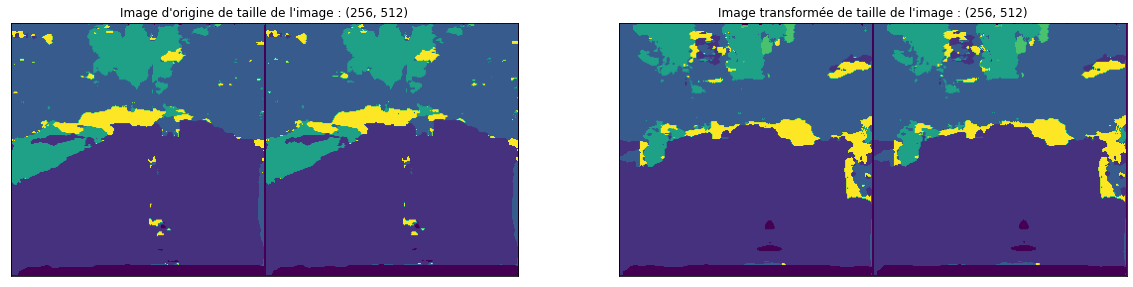

In [54]:
import matplotlib.pyplot as plt
def show_2img(img, img_):
    plt.figure(figsize=(20,12))
    plt.subplot(1,2,1)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Image d'origine de taille de l'image : {img.shape}")
    plt.imshow(img)
    
    plt.subplot(1,2,2)
    plt.xticks([])
    plt.yticks([])
    plt.title(f"Image transformée de taille de l'image : {img.shape}")
    plt.imshow(img_)
    plt.show()

y = model.predict_class(my_validation_batch_generator)
show_2img(y[0], y[1])

## Entrainement du model Resnet

In [ ]:
img_input_shape = (1024, 2048,1)


df = pd.read_csv('data.csv')

my_training_batch_generator = MY_Generator(df.id[:100], 2)
my_validation_batch_generator = MY_Generator(df.id[100:140], 2)


model_resnet.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])


model_resnet.fit_generator(generator=my_training_batch_generator,
                    epochs=5,
                    verbose=1,
                    validation_data=my_validation_batch_generator)

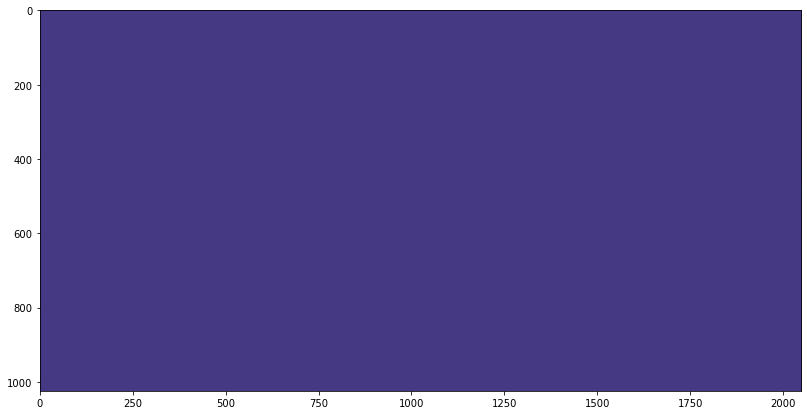

In [249]:
plt.figure(figsize=(20,7))
plt.imshow(p)
plt.show()

# Evaluation des modèles